# Random Forest Regression

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.style.use('tableau-colorblind10')

In [2]:
# Import data file

dataset=pd.read_csv('insurance.csv')

dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Histogram of charge (label)

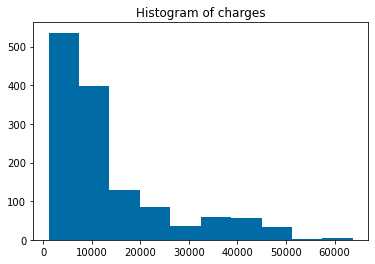

In [3]:
plt.hist(dataset['charges'])
plt.title("Histogram of charges")
plt.show() 

## Encoding categorical data

In [4]:
objList = dataset.select_dtypes(include = "object").columns
print (objList)

Index(['sex', 'smoker', 'region'], dtype='object')


In [5]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    dataset[feat] = le.fit_transform(dataset[feat].astype(str))

print (dataset.info())

dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB
None


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Create X and y arrays

In [6]:
# Create X set and y set. They are arrays and vectors
#X=dataset.iloc[:,0].values
X=dataset.iloc[:,:-1].values
print(X)
y=dataset.iloc[:,-1].values

#print(y)

[[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   36.85  0.    0.    2.  ]
 [21.    0.   25.8   0.    0.    3.  ]
 [61.    0.   29.07  0.    1.    1.  ]]


## Transforming y (label)

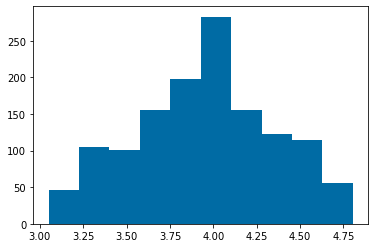

In [7]:
yt=np.log10(y)
plt.hist(yt)
plt.show() 

## Creating Training and Test Data Sets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=44)

## Training Random Forest Regression on Training set

In [9]:
from sklearn.ensemble import RandomForestRegressor #Calling random forest regression class
regressor=RandomForestRegressor(verbose=0) #Creating an object of Random Forest Regressor
regressor.fit(X_train, y_train) #Method of the Random Forest Regressor class

RandomForestRegressor()

## Predicting Test set results

In [10]:
y_pred=regressor.predict(X_test) # Predicting values on test data
#print(y_pred)

In [11]:
np.set_printoptions(precision=2) 
#  To display with two decimal points all printed values

### Representation of y_pred vs y_test in simple scatter plot and line representation.

The gold line represents an ideal match between "measuring devices"
The blue line represents the actual match between Y_pred and Y_test.

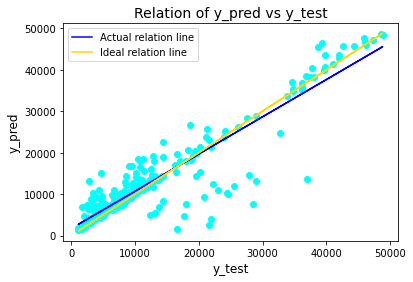

Slope: m= 0.90
Intercept: b= 1695.32


In [12]:
plt.scatter(y_test, y_pred,  color='cyan')
m, b = np.polyfit(y_test, y_pred, 1) # 1 is the degree of the polynomial to fit.
plt.plot(y_test, m*y_test+b, color='blue', label="Actual relation line")
plt.plot(y_test, y_test, color='gold', label="Ideal relation line")
plt.title("Relation of y_pred vs y_test", fontsize=14)
plt.xlabel("y_test", fontsize=12)
plt.ylabel("y_pred", fontsize=12)
plt.legend()
plt.show()
print("Slope: m=","{:.2f}".format(m))
print("Intercept: b=","{:.2f}".format(b))

### Calculating Regression model's precision (Aspect Ratio: AR)

In [13]:
#Estimating correlation coefficient and R^2 between Y_pred and Y_test
from sklearn.metrics import r2_score
correlation_matrix = np.corrcoef(y_test, y_pred)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("R: ", "{:.2f}".format(correlation_xy))
print("R-squared between y_pred and y_test: ", "{:.2f}".format(r2_score(y_test,y_pred)))

R:  0.92
R-squared between y_pred and y_test:  0.84


In [14]:
# Aspect ratio calculation (precision)
AR=(1-correlation_xy)**(0.5-1)
print(" 'Aspect Ratio': ", "{:.2f}".format(AR))

 'Aspect Ratio':  3.54


### Hyperparameter optimization

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

### Randomized search

In [16]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

### Random grid creation

In [17]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 177, 255, 333, 411, 488, 566, 644, 722, 800], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


### Creating a function to evaluate random search of models

In [18]:
def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    res = r2_score(y_test, preds) #Using R^2 for evaluation 
    print('Model Performance')
    print('R^2 of: ', "{:.2f}".format(res))
    
    return res

In [19]:
regressor_R2 = evaluate(regressor, X_test, y_test)

Model Performance
R^2 of:  0.84


### Performing random search for best hyperparameters

In [20]:
%%time
# Random search of parameters, using default 5 fold cross validation, 
# search across 100 different combinations

random_regressor = RandomizedSearchCV(estimator = regressor, 
                                      param_distributions = random_grid, 
                                      n_iter = 100, verbose=2, random_state=44, n_jobs = -1)
search = random_regressor.fit(X_train, y_train)
search.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 1.1 s, sys: 102 ms, total: 1.2 s
Wall time: 39.7 s


{'n_estimators': 411,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 5}

Best hyperparameters when yt (transformed) is used:{'n_estimators': 177,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20}

Best hyperparameters when **y** is not transformed:
{'n_estimators': 411,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 5}

In [21]:
%%time
best_regressor=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           min_samples_leaf=10, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=411, n_jobs=-1,
           random_state=44, verbose=0, warm_start=False) #Creating an object of Random Forest Regressor
best_regressor.fit(X_train, y_train)
best_regressor_R2=evaluate(best_regressor,X_test,y_test)

Model Performance
R^2 of:  0.87
CPU times: user 925 ms, sys: 167 ms, total: 1.09 s
Wall time: 630 ms


In [22]:
y_best_pred=best_regressor.predict(X_test)

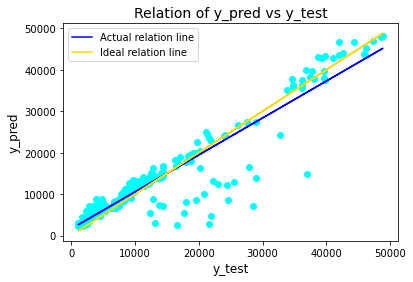

Slope: m= 0.89
Intercept: b= 1620.69


In [23]:
plt.scatter(y_test, y_best_pred,  color='cyan')
m, b = np.polyfit(y_test, y_best_pred, 1) # 1 is the degree of the polynomial to fit.
plt.plot(y_test, m*y_test+b, color='blue', label="Actual relation line")
plt.plot(y_test, y_test, color='gold', label="Ideal relation line")
plt.title("Relation of y_pred vs y_test", fontsize=14)
plt.xlabel("y_test", fontsize=12)
plt.ylabel("y_pred", fontsize=12)
plt.legend()
plt.show()
print("Slope: m=","{:.2f}".format(m))
print("Intercept: b=","{:.2f}".format(b))

In [24]:
#Estimating correlation coefficient and R^2 between Y_best_pred and Y_test

correlation_matrix = np.corrcoef(y_test, y_best_pred)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("R-squared between y_best_pred and y_test: ", "{:.2f}".format(r_squared))

R-squared between y_best_pred and y_test:  0.87


In [25]:
# Aspect ratio calculation (precision)
AR=(1-correlation_xy)**(0.5-1)
print(" 'Aspect Ratio': ", "{:.2f}".format(AR))

 'Aspect Ratio':  3.90


### Performing grid search

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 400, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5]

In [28]:
search_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(search_grid)

{'n_estimators': [100, 175, 250, 325, 400], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 17, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]}


In [29]:
%%time
# Random search of parameters, using default 5 fold cross validation, 
# search across 100 different combinations

grid_regressor = GridSearchCV(regressor, search_grid, scoring='r2', n_jobs=-1,
                              refit=True, cv=None, verbose=2)
search = grid_regressor.fit(X_train, y_train)
search.best_params_

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
CPU times: user 2.31 s, sys: 217 ms, total: 2.53 s
Wall time: 1min 33s


{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 175}

Best hyper parameters from grid search:
    
{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [30]:
%%time
best_grid_regressor=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           min_samples_leaf=5, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
           random_state=44, verbose=0, warm_start=False) #Creating an object of Random Forest Regressor
best_grid_regressor.fit(X_train, y_train)
best_grid_regressor_R2=evaluate(best_regressor,X_test,y_test)

Model Performance
R^2 of:  0.87
CPU times: user 407 ms, sys: 95.5 ms, total: 503 ms
Wall time: 313 ms


In [31]:
y_best_gpred=best_grid_regressor.predict(X_test)

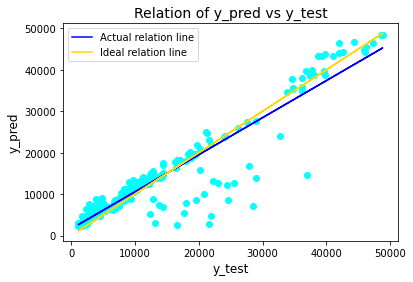

Slope: m= 0.89
Intercept: b= 1617.83


In [32]:
plt.scatter(y_test, y_best_gpred,  color='cyan')
m, b = np.polyfit(y_test, y_best_gpred, 1) # 1 is the degree of the polynomial to fit.
plt.plot(y_test, m*y_test+b, color='blue', label="Actual relation line")
plt.plot(y_test, y_test, color='gold', label="Ideal relation line")
plt.title("Relation of y_pred vs y_test", fontsize=14)
plt.xlabel("y_test", fontsize=12)
plt.ylabel("y_pred", fontsize=12)
plt.legend()
plt.show()
print("Slope: m=","{:.2f}".format(m))
print("Intercept: b=","{:.2f}".format(b))

In [33]:
#Estimating correlation coefficient and R^2 between Y_best_pred and Y_test

correlation_matrix = np.corrcoef(y_test, y_best_gpred)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("R-squared between y_best_gpred and y_test: ", "{:.2f}".format(r_squared))

R-squared between y_best_gpred and y_test:  0.87


In [34]:
# Aspect ratio calculation (precision)
AR=(1-correlation_xy)**(0.5-1)
print(" 'Aspect Ratio': ", "{:.2f}".format(AR))

 'Aspect Ratio':  3.88
